## Importing libraries

In [74]:
import pandas as pd
import numpy as np

### Reading the dataset

In [75]:
df = pd.read_csv('movie_dataset.csv')

In [76]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


### Creating a new dataset with specific columns

In [77]:
column_names = ['id','title', 'genres','popularity','vote_average','vote_count','overview']

In [78]:
df_new =  pd.DataFrame(data =  df, columns = column_names)

In [79]:
df_new.head()

,id,title,genres,popularity,vote_average,vote_count,overview
0,19995,Avatar,Action Adventure Fantasy Science Fiction,150.437577,7.2,11800,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,139.082615,6.9,4500,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,Action Adventure Crime,107.376788,6.3,4466,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Action Crime Drama Thriller,112.312950,7.6,9106,Following the death of District Attorney Harve...
4,49529,John Carter,Action Adventure Science Fiction,43.926995,6.1,2124,"John Carter is a war-weary, former military ca..."


### Filtering of DATA

In [80]:
vote_mean = df_new['vote_average'].mean()
print(vote_mean)

6.092171559442016


In [81]:
vote_quantile = df_new['vote_count'].quantile(0.8)
print(vote_quantile)

957.6000000000004


In [82]:
new_movies = df_new.copy().loc[df_new['vote_count']>=vote_quantile]


In [83]:
def movie(a,b=vote_mean,c=vote_quantile):
    x = a['vote_count']
    y = a['vote_average']
    return (x/(x+b)*y)+(b/(b+x)*c)

In [84]:
new_movies['score'] = new_movies.apply(movie,axis=1)

In [85]:
new_movies = new_movies.sort_values('score',ascending = False)

new_movies[['id','title','vote_count','vote_average','score']].head()

,id,title,vote_count,vote_average,score
4081,582,The Lives of Others,958,7.9,13.901226
4017,76,Before Sunrise,959,7.7,13.696271
3813,770,Gone with the Wind,970,7.7,13.628696
1663,311,Once Upon a Time in America,1069,8.2,13.579918
3739,703,Annie Hall,1010,7.8,13.494704


## Importing SKLEARN LIBRARIES

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### On basis of Overview

In [87]:
vectorizer1 = CountVectorizer()
df_new['overview'] = df_new['overview'].fillna('')
Overview = vectorizer1.fit_transform(df_new['overview'])

Overview.shape

(4803, 21262)

In [88]:
y_overview = cosine_similarity(Overview,Overview)

In [89]:
indices = pd.Series(df_new.index,index=df_new['title']).drop_duplicates()

### Creating the recomendation sytem

In [90]:
def recomendations_overview(title,value=y_overview):
    idex = indices[title]
    scores = list(enumerate(value[idex]))
    scores = sorted(scores,key=lambda x : x[1], reverse = True)
    scores = scores[1:51]

    movie = [i[0] for i in scores]

    return(df_new['title'].iloc[movie])

#### Getting user input

In [91]:
column = ['title','popularity']
df_demo = pd.DataFrame(data = df_new, columns = column )
df_demo.head()

,title,popularity
0,Avatar,150.437577
1,Pirates of the Caribbean: At World's End,139.082615
2,Spectre,107.376788
3,The Dark Knight Rises,112.312950
4,John Carter,43.926995


In [92]:
movie_name = "Avatar"
df_final = recomendations_overview(movie_name)
#print(df_final)
df_popularity ={'title1':[],'popularity1':[]}
a,b = 0,0
for i in df_final:
    x = df_demo.loc[df_demo['title']==i,'popularity'].iloc[0]
    df_popularity['title1'].append(i)
    df_popularity['popularity1'].append(x)
    print(i)
df_main = pd.DataFrame(data = df_popularity, columns = ['title1','popularity1'])



Apollo 18
Two Evil Eyes
Semi-Pro
Mission: Impossible - Ghost Protocol
Dinner Rush
Hellboy II: The Golden Army
Repo Men
Brave New Girl
Ponyo
Beneath the Planet of the Apes
The Adventures of Pluto Nash
We Have Your Husband
Puss in Boots
Stay Alive
Dirty Pretty Things
The Charge of the Light Brigade
The Boat That Rocked
Captain America: The Winter Soldier
Aliens vs Predator: Requiem
Warlock
From a Whisper to a Scream
Gladiator
Pearl Harbor
The Midnight Meat Train
Avengers: Age of Ultron
Jack Reacher
The Thief and the Cobbler
Aliens in the Attic
Underworld: Evolution
Bound by Honor
Teeth and Blood
Criminal
Me Before You
The Queen
E.T. the Extra-Terrestrial
Jack the Giant Slayer
Brave
Hard to Be a God
The Raid
Air Force One
Thank You for Smoking
The SpongeBob Movie: Sponge Out of Water
Samsara
Dragon Blade
The Chronicles of Narnia: Prince Caspian
Whipped
The Last Samurai
Tropic Thunder
Transporter 2
Starship Troopers


In [93]:
import matplotlib.pyplot as plt

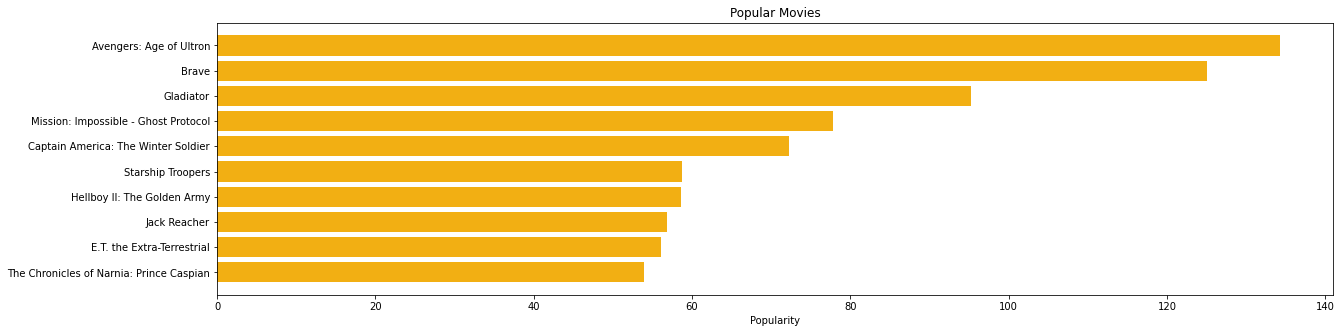

In [108]:
pop = df_main.sort_values('popularity1',ascending=False)
plt.figure(figsize=(20,5))

plt.barh(pop['title1'].head(10),pop['popularity1'].head(10),color='#F2AF13')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()